In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011.ipynb
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011.jpg
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_01.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_02.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_03.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_04.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_05.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_06.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_07.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_08.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_09.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_10.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_11.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_12.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_13.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_14.

In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
# Ephemeris
BJD0 = 2448773.21461 - 2400000
dBJD0 = 0.00009
P0 = 0.0623628426
dP0 = 0.0000000006

# Calculate the Epoch
Epoch = (BJD_time - BJD0)/P0
#print(E)

x = BJD_time
y = OC
dy = OC_err

len_x = len(x)

In [5]:
a = 0
b = 0
c = 0
K = 33.7       #m/s
w = -1.36           #rad
P = 10220       #days
tau = 53025   #days
e = 0.39               #No-unit

In [6]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [7]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def lnquadLTT_fit(t,a,b,c,K,w,P,tau,e):
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    return a*Epoch*Epoch + b*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [8]:
import scipy.optimize as optimization  
guess = (a,b,c,K,w,P,tau,e)
params, params_covariance = optimization.curve_fit(lnquadLTT_fit, x, y,sigma=dy, absolute_sigma=False,p0=guess)

In [9]:
a = params[0]
b = params[1]
c = params[2]
K = params[3]
w = params[4]
P = params[5]
tau = params[6]
e = params[7]


da = params_covariance[0,0]
db = params_covariance[1,1]
dc = params_covariance[2,2]
dK = params_covariance[3,3]
dw = params_covariance[4,4]
dP = params_covariance[5,5]
dtau = params_covariance[6,6]
de = params_covariance[7,7]


oc_lnquadLTT_fit = lnquadLTT_fit(x,*params)
#print(ocfit)


if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi
#    print(K,P,e,w,w_deg,tau)


##T
T = c/(24*60*60) + BJD0 + 2400000
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dBJD0**2))
#T = BJD0
#print(T)
#print(dT)

##P
Period = (b/(24*60*60)) + P0
dPeriod = np.sqrt((((db**(0.5))/(24*60*60))**2) + (dP0**2))
#print(P)
#print(dP)

#Period decrease
P_dot = 2*a/(P0*24*60*60)
#print(P_dot)

dP_dot = 2*a*(dP0*24*60*60)/((P0*24*60*60)**2)
#print(dP_dot)

print("The Keplerian parameters:")
print("dP =", b, "+/-", db**0.5, "[s]")
print("dT0 =", c, "+/-", dc**0.5, "[s]")
print("T0 =", T, "+/-", dT, "[days]")
print("P_bin =", Period, "+/-", dPeriod, "[days]")
print("P_dot =", P_dot, "+/-", dP_dot, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("P_d =", P, "+/-", dP**0.5, "[days]")
print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
print("e =", e, "+/-", de**0.5, "[-]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")
print("tau =", tau, "+/-", dtau**0.5, "[days]")

The Keplerian parameters:
dP = 0.0005091577956978023 +/- 0.00131741645770813 [s]
dT0 = -1.8417499156624377 +/- 22.8449074766526 [s]
T0 = 2448773.2145886836 +/- 0.00027930616697237993 [days]
P_bin = 0.062362848493030046 +/- 1.5259676024879788e-08 [days]
P_dot = -5.104282666146377e-13 +/- -4.910888394442472e-21 [s]
K = 54.870806997841456 +/- 60.5204263105313 [s]
P_d = 14199.689036931737 +/- 10296.110721249395 [days]
P_yr = 38.876629806794625 +/- 28.189214842571925 [years]
e = 0.2345990440251409 +/- 0.31242286225032995 [-]
w = -1.8175072581052403 +/- 0.32714428397676903 [rad]
w_deg = -104.13549512382465 +/- 18.74398676369815 [deg]
tau = 52646.000657340504 +/- 625.5230078802559 [days]


In [10]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = lnquadLTT_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

#Reduced_chisqrt
n = 8
dof = len_x - n
Chi_sqr = ((y - oc_lnquadLTT_fit)**2/(dy)**2)/dof
Reduced_chisq_lnquadLTT = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_lnquadLTT)

Reduced_chisq: 0.11508685920408478


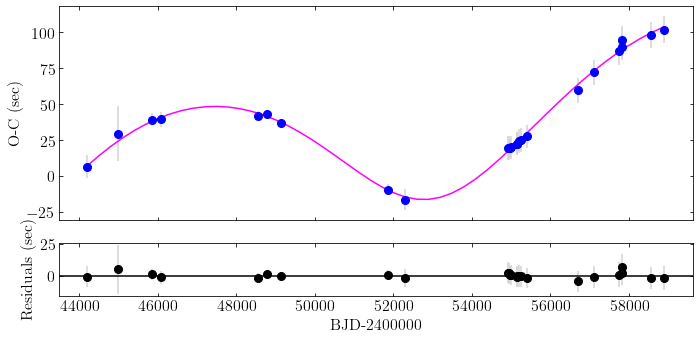

In [11]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='magenta')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Res_lnquadLTT_fit = y-oc_lnquadLTT_fit

ax1.errorbar(x, Res_lnquadLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()